In [1]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import mysql
import requests
import pandas as pd
import mysql.connector
import pymysql
from dotenv import load_dotenv
from sqlalchemy import create_engine

In [5]:
api_key = os.getenv("API_KEY")
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_name = os.getenv("DB_NAME")

In [6]:
connection_string = f'mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection_string)
query = 'SELECT * FROM air_quality'
df = pd.read_sql(query, engine)
print(df.head)
print(df.info)

<bound method NDFrame.head of             id         city        time       co     no    no2      o3  \
0            1    New Dheli  1672549200   226.97   0.00   2.46   44.70   
1            2      Beijing  1672549200   370.50   7.93  20.56   57.22   
2            3        Miami  1672549200   226.97   0.01  12.85   36.84   
3            4        Tokyo  1672549200   487.33  94.77  95.96   17.70   
4            5   Pittsburgh  1672549200   280.38   0.09  17.48   17.17   
...        ...          ...         ...      ...    ...    ...     ...   
223471  223472        Tokyo  1740330000   320.44   0.02  49.35   40.77   
223472  223473  Mexico City  1740330000  2456.67   6.99  75.40  306.13   
223473  223474      Beijing  1740330000   734.33   3.35  89.11    3.40   
223474  223475  Los Angeles  1740330000   741.01  46.94  77.46   23.60   
223475  223476      Bangkok  1740330000  3257.75  50.96  87.05    0.00   

           so2   pm2_5    pm10     nh3  
0         0.94    6.73    7.24    0.19  

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt

In [9]:
def get_aqi(pollutants):
    lims = [
        {'co': 15400, 'no2' : 2000, 'o3' : 180, 'so2' : 350, 'pm2_5' : 75, 'pm10' : 200},
        {'co': 12400, 'no2' : 150, 'o3' : 140, 'so2' : 250, 'pm2_5' : 50, 'pm10' : 100},
        {'co': 9400, 'no2' : 70, 'o3' : 100, 'so2' : 80, 'pm2_5' : 25, 'pm10' : 50},
        {'co': 4400, 'no2' : 40, 'o3' : 60, 'so2' : 20, 'pm2_5' : 10, 'pm10' : 20},
    ]
    
    for i, lim in enumerate(lims):
        for l in lim:
            if pollutants[l] >= lim[l]:
                return len(lims) - i + 1
    return 1
    
p = {'co': 226.97, 'no' : 0.00, 'no2' : 2.46, 'o3' : 44.7, 'so2' : 0.94, 'pm2_5' : 6.73, 'pm10' : 7.24, 'nh3': 0.19}
p1 = {'co': 226.97, 'no' : 0.00, 'no2' : 200, 'o3' : 44.7, 'so2' : 0.94, 'pm2_5' : 6.73, 'pm10' : 7.24, 'nh3': 0.19}
p2 = {'co': 226.97, 'no' : 0.00, 'no2' : 2.46, 'o3' : 44.7, 'so2' : 0.94, 'pm2_5' : 80, 'pm10' : 7.24, 'nh3': 0.19}
print(get_aqi(p))
print(get_aqi(p1))
print(get_aqi(p2))

1
4
5


['New Dheli' 'Beijing' 'Miami' 'Tokyo' 'Pittsburgh' 'Shanghai' 'Sweden'
 'Denver' 'Mexico City' 'Bangkok' 'Kansas' 'Los Angeles']


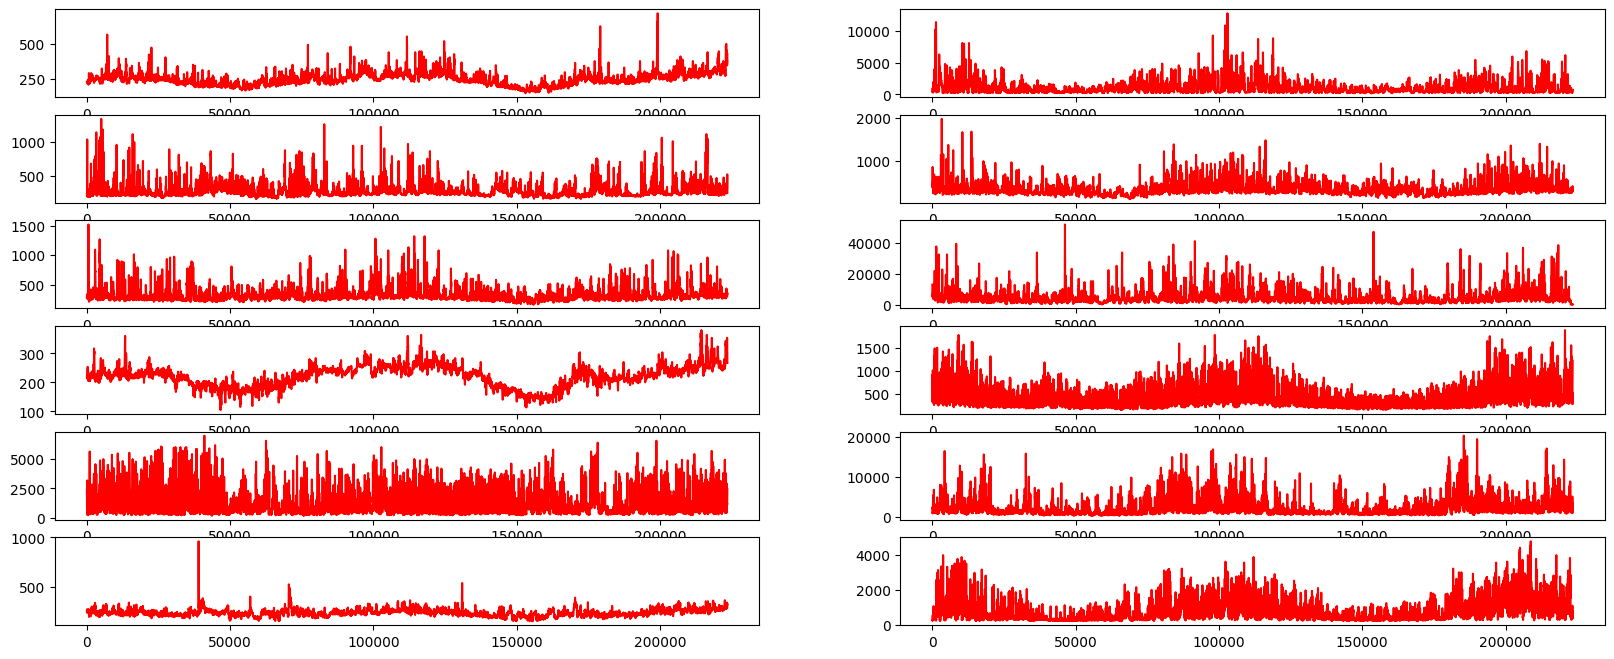

In [10]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
cities = df['city'].unique()
print(cities)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 8))
row = 0
col = 0
for city in cities:
    df_city = df.loc[df['city'] == city]
    df_city['co'].plot(ax=axes[row, col], color='Red')
    col += 1
    if col == 2:
        col = 0
        row += 1
plt.show()

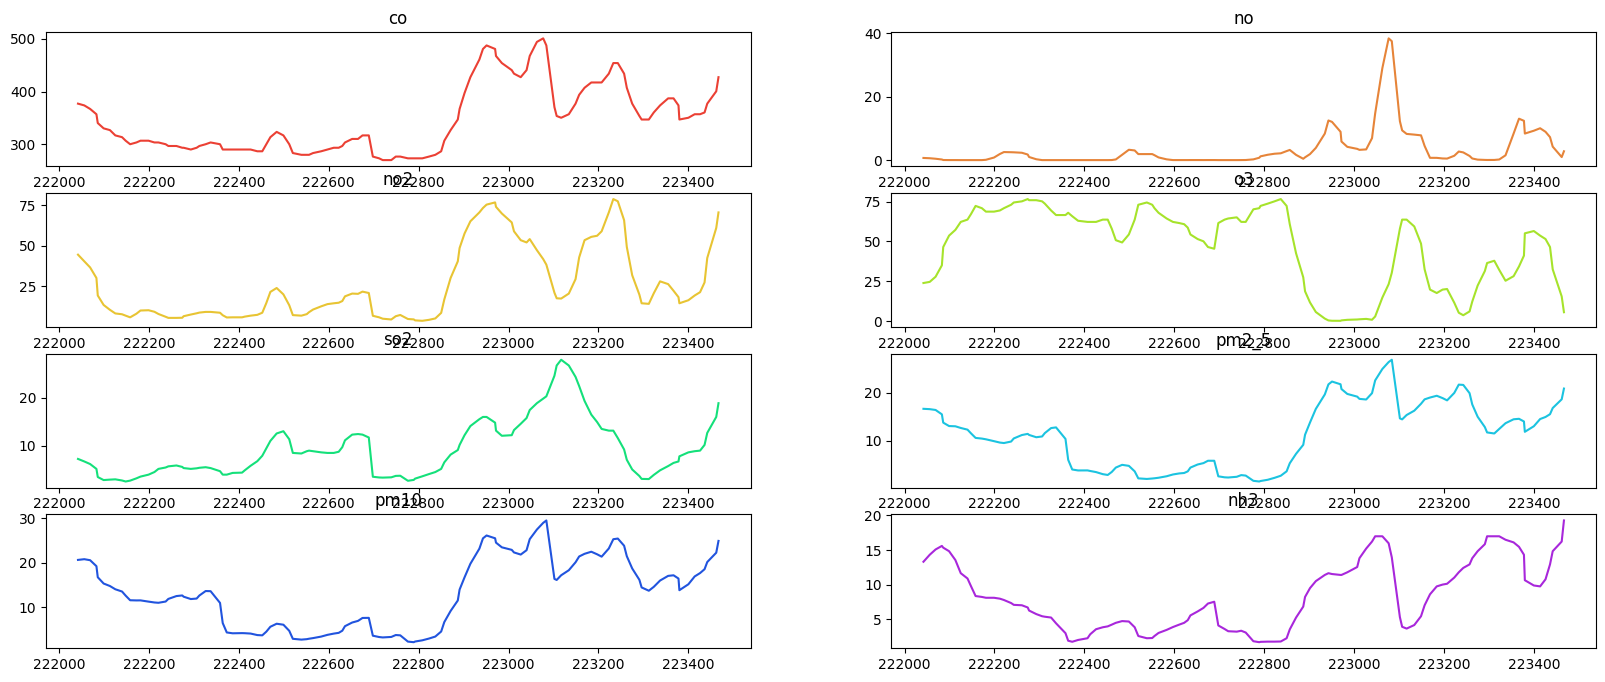

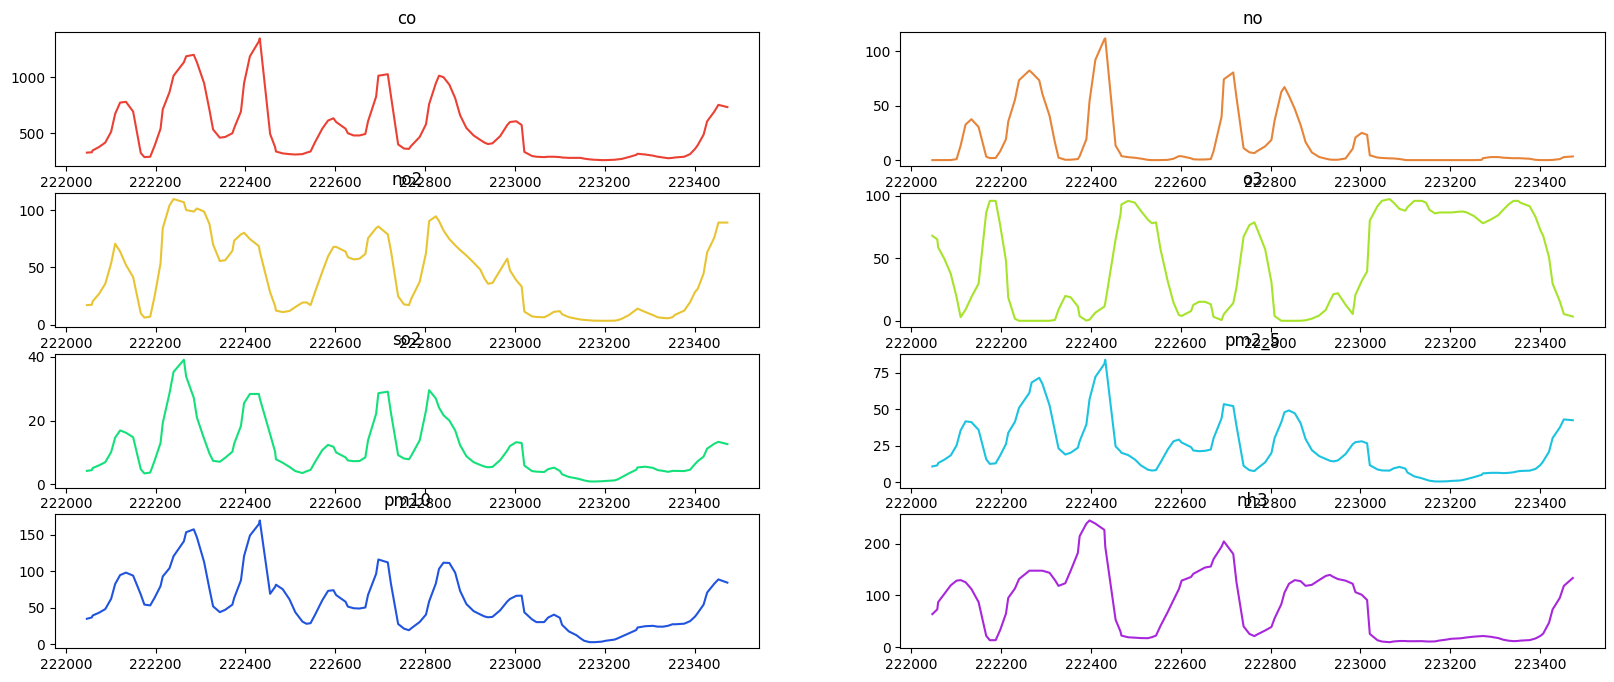

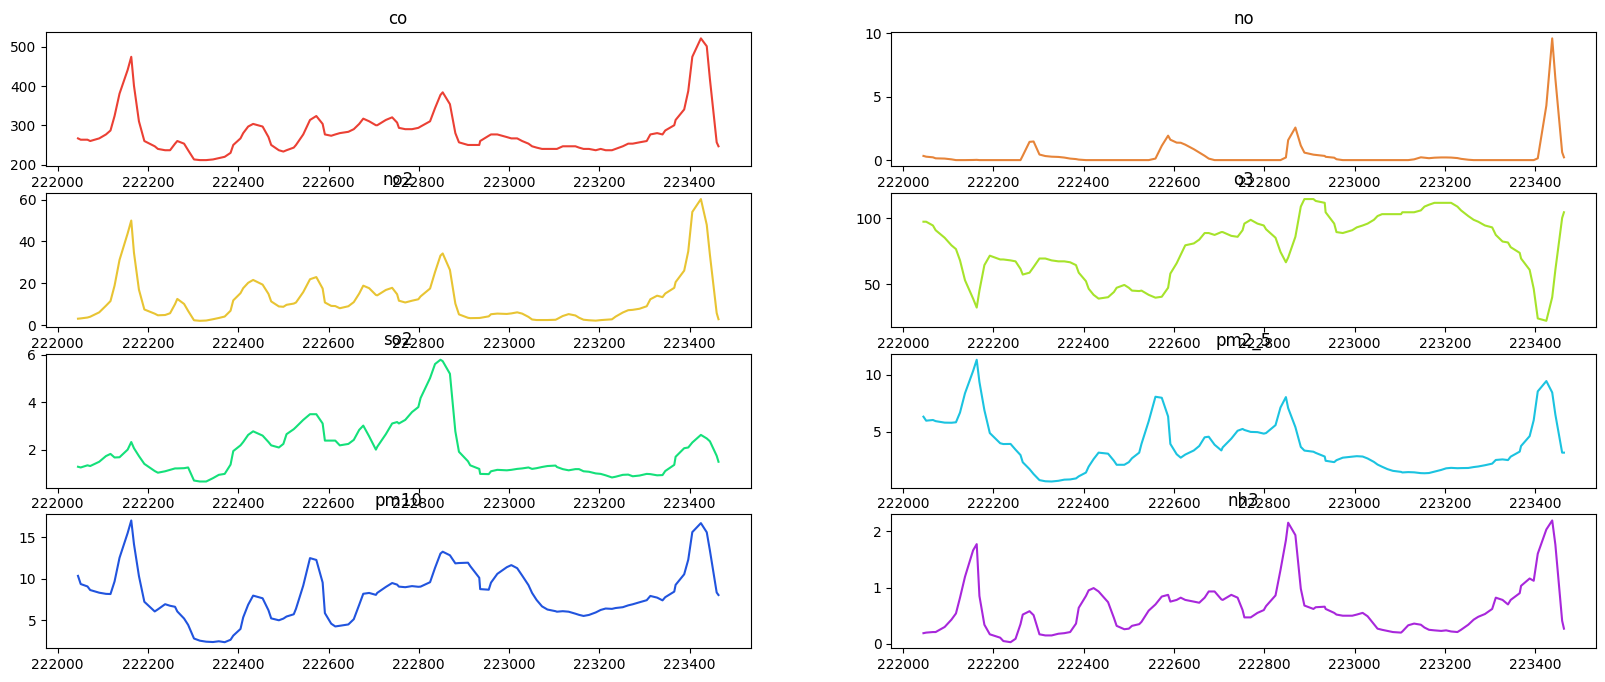

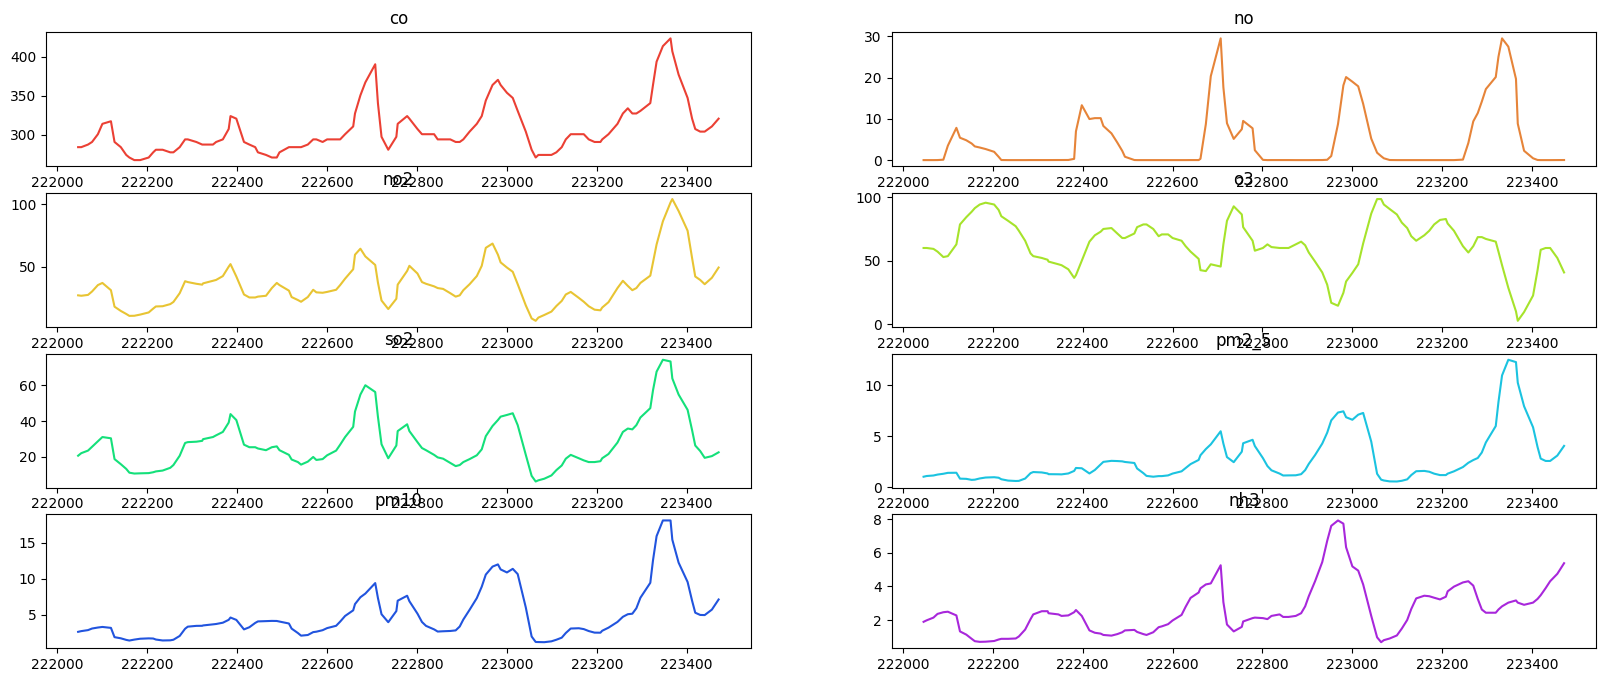

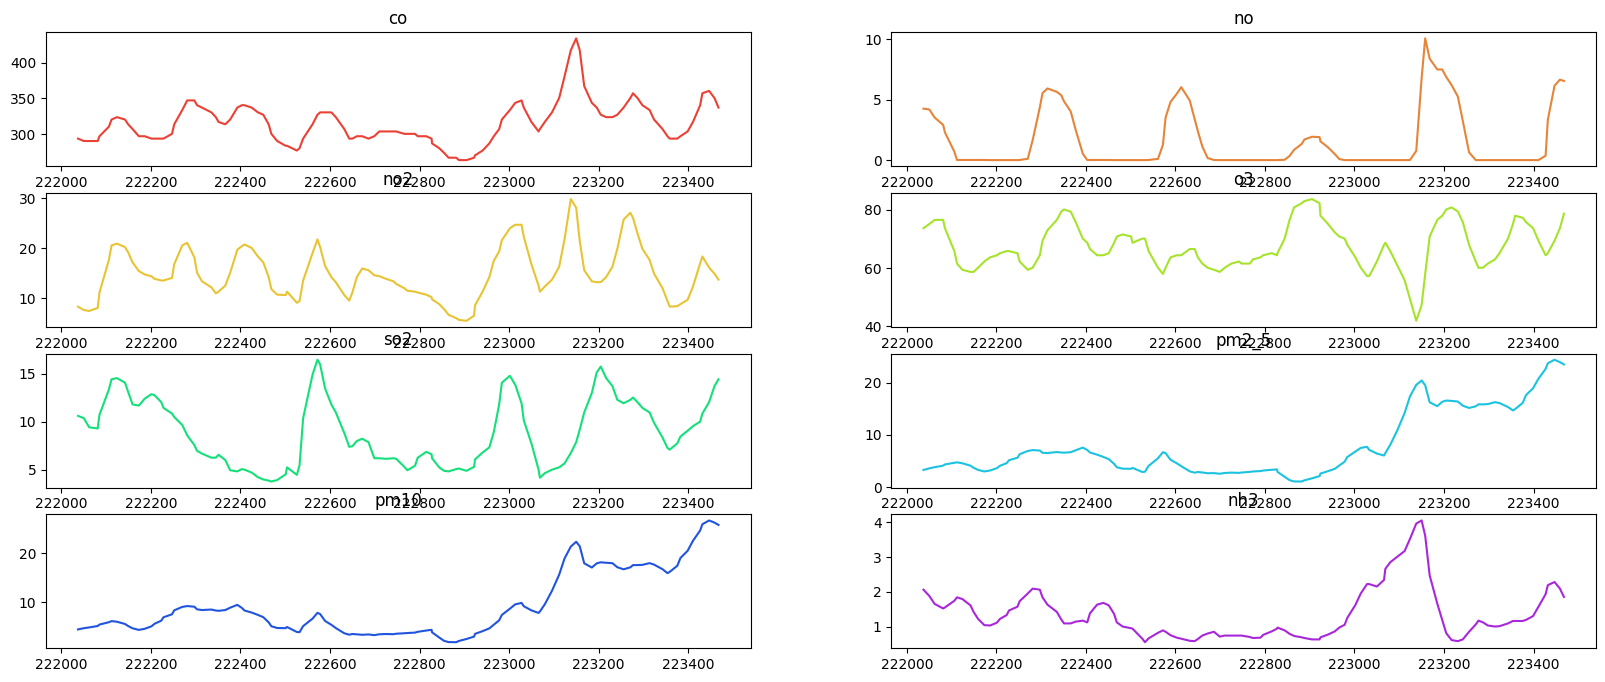

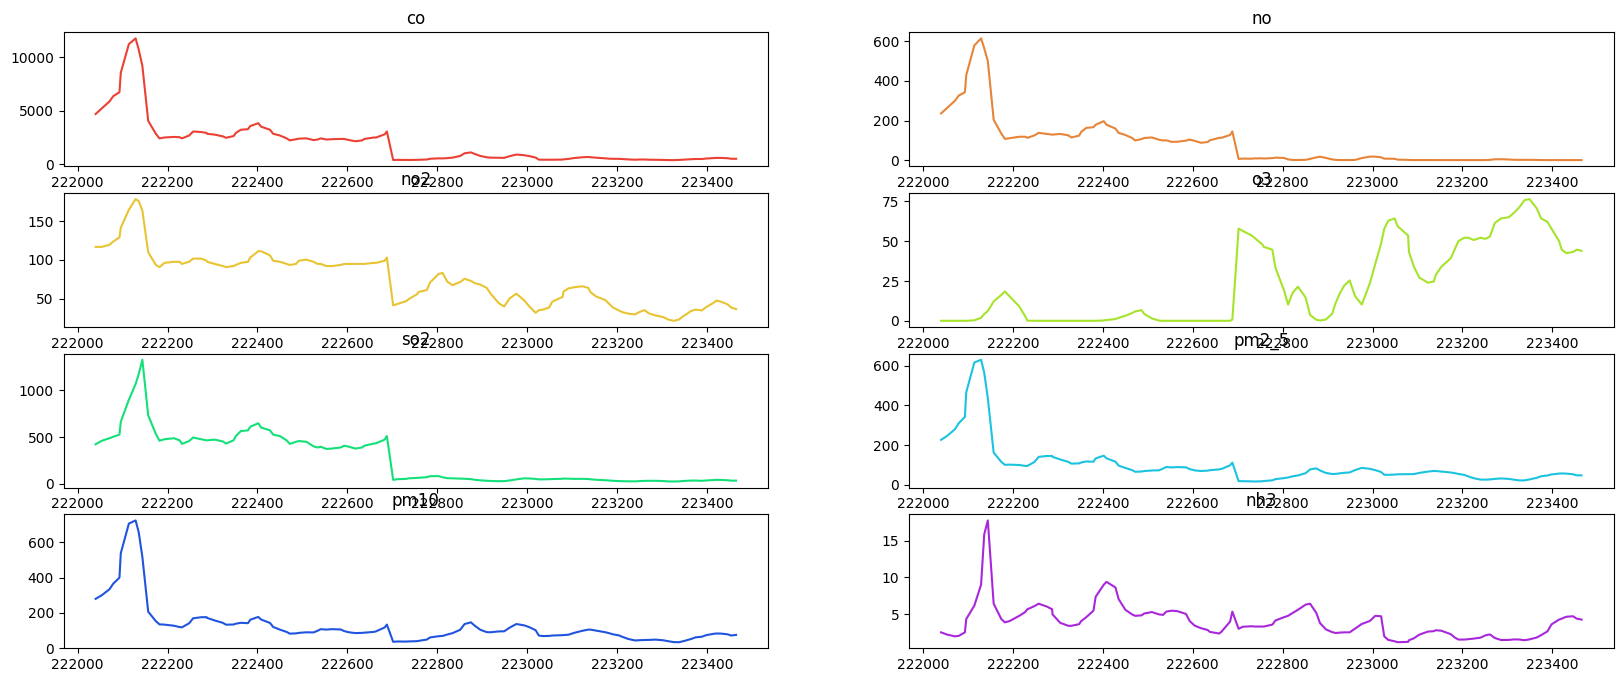

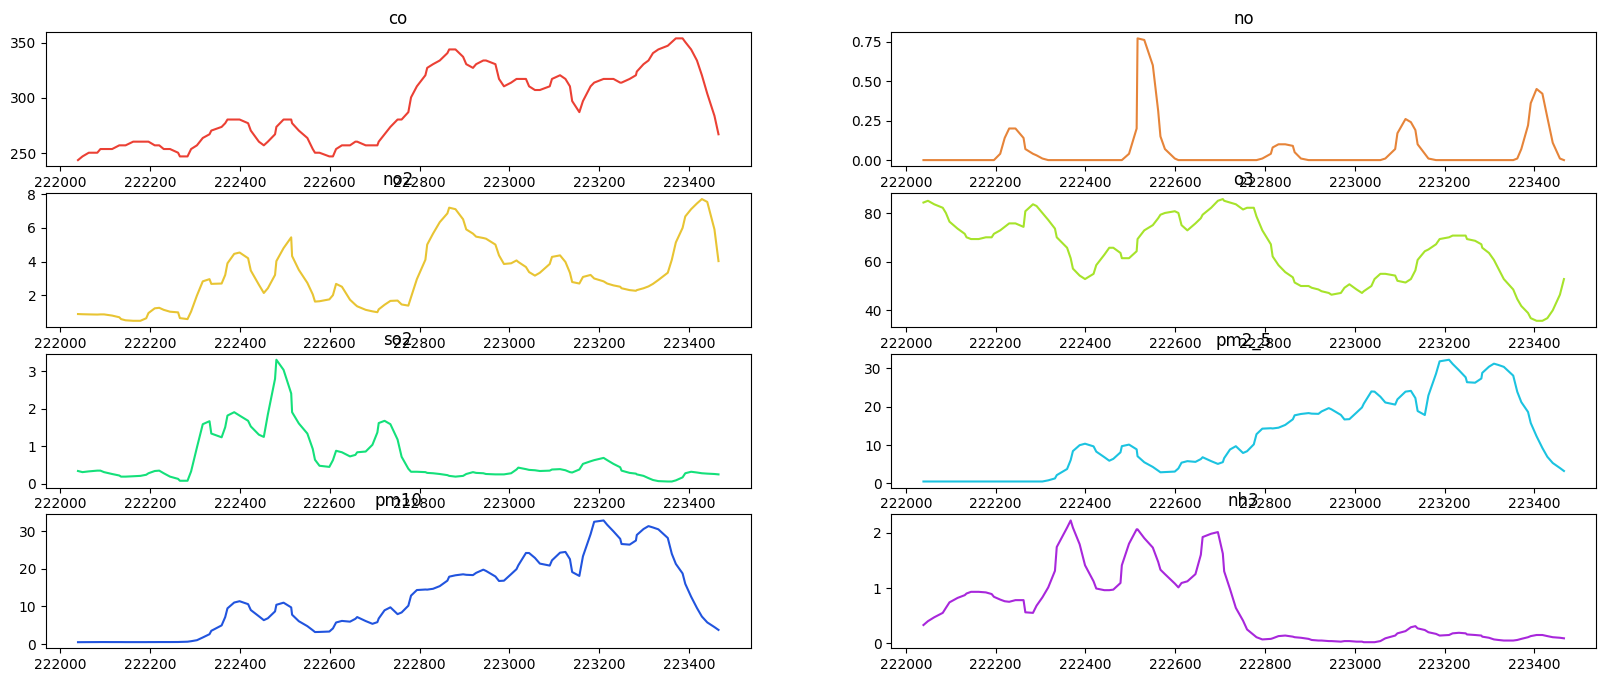

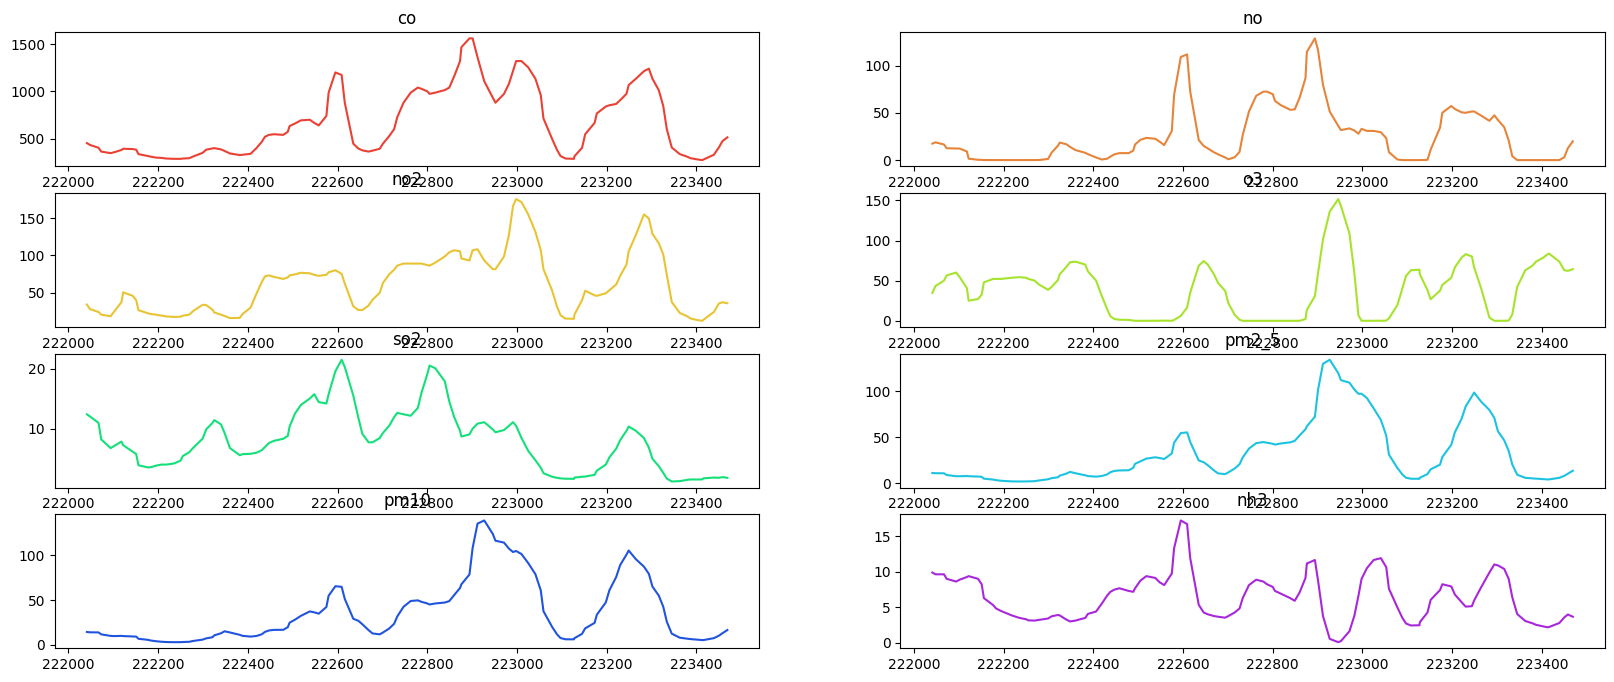

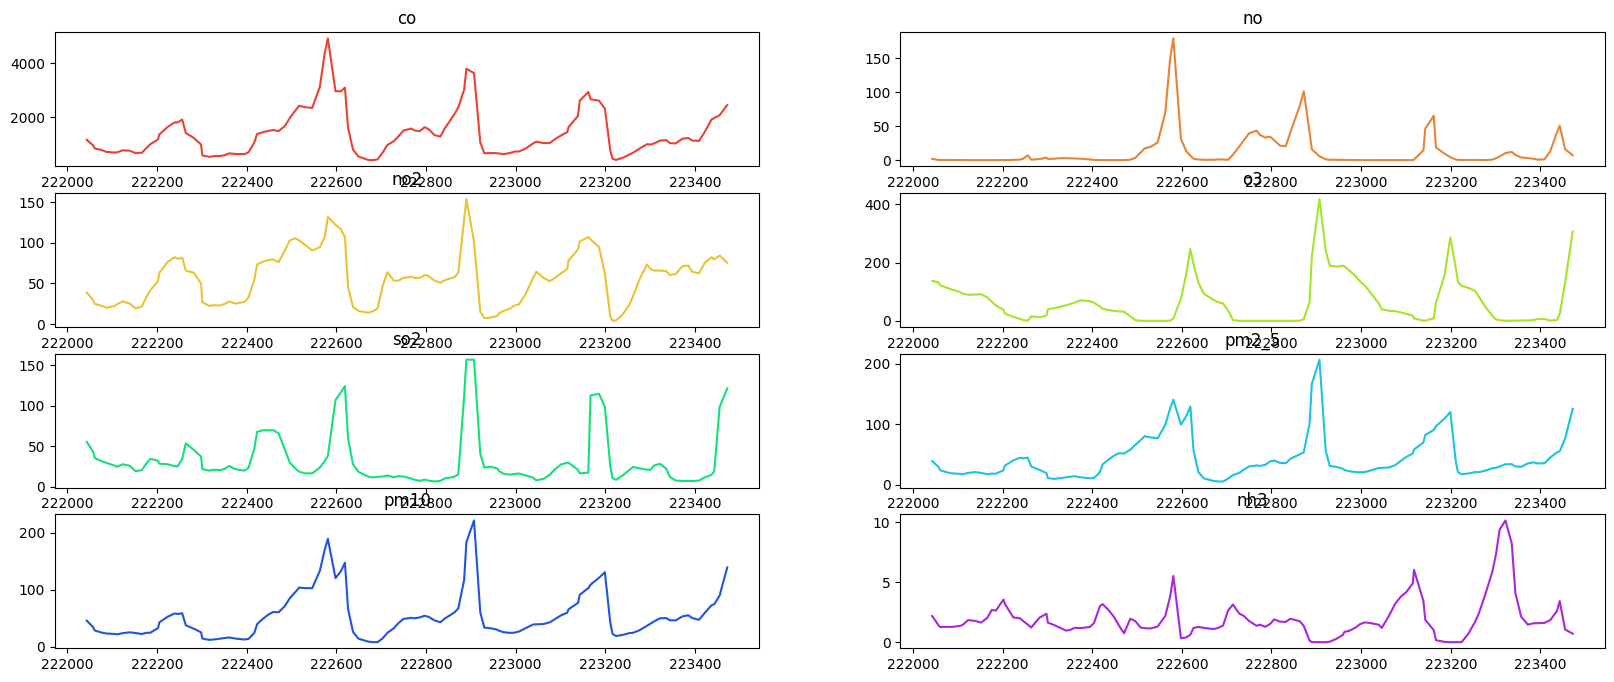

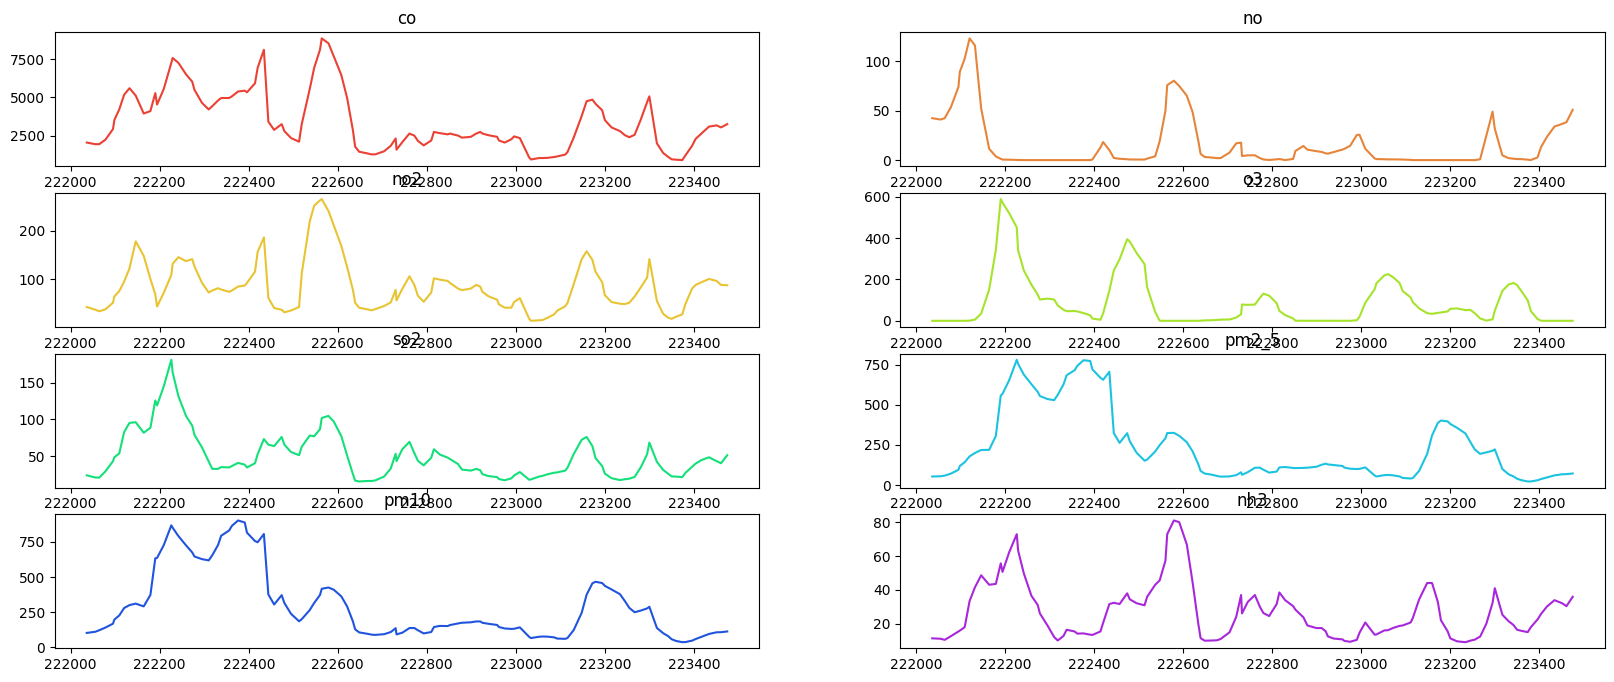

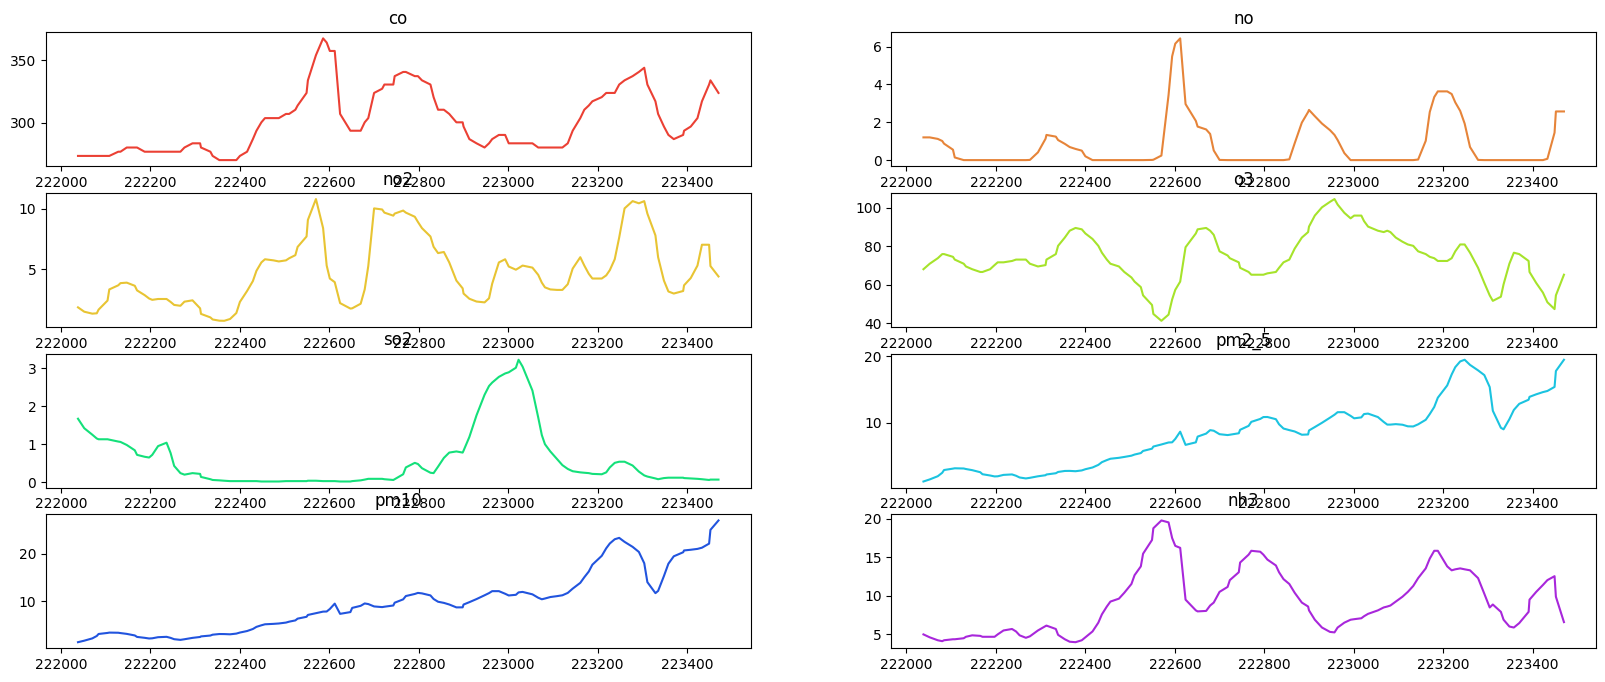

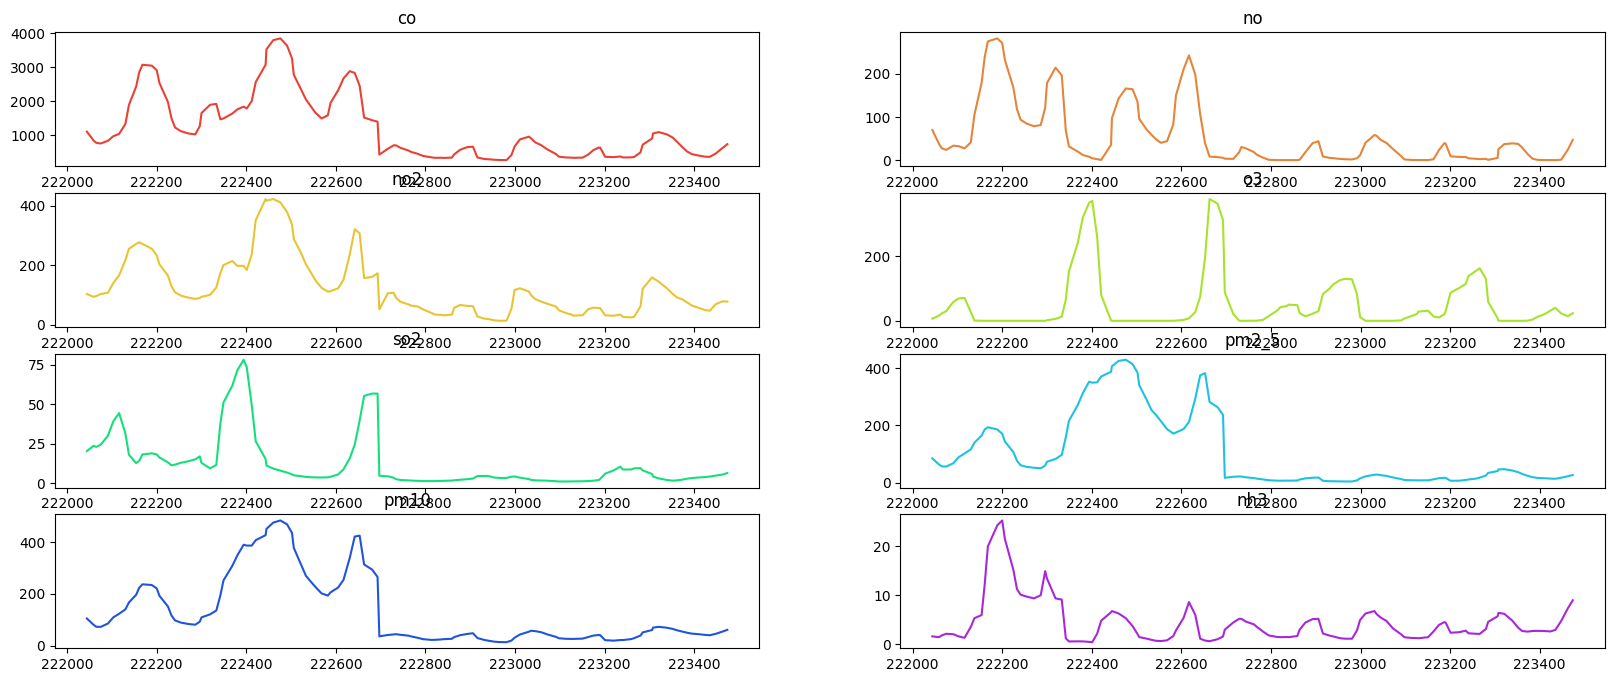

In [12]:
colors = {'co' : '#eb4034', 'no' : '#e68439', 'no2' : '#e8c433', 'o3' : '#a6e32b',
          'so2' : '#14e07a', 'pm2_5' : '#1bc3e0', 'pm10' : '#2154de', 'nh3' : '#a827db'}
df = df.loc[(df[pollutants] >= 0.0).all(axis=1)]
start = int(df['time'].max() - 432000)
df_time = df.loc[df['time'] > start]

cities = df['city'].unique()
for city in cities:
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 8))
    df_city = df_time.loc[df_time['city'] == city]
    row = 0
    col = 0
    for pollutant in pollutants:
        df_city[pollutant].plot(ax=axes[row, col], title=pollutant, color=colors[pollutant])
        col += 1
        if col == 2:
            col = 0
            row += 1
    plt.show()